# Practica: Prediccion Precio Viviendas Airbnb

En este notebook realizaremos un proyecto de Machine Learning en el que utilizaremos los conceptos y tecnicas aprendidas durante el modulo de 'Machine Learning 101' del Bootcamp de Keepcoding.

Se trata de un problema de regresión, en el que prediciremos el precio final de ciertas viviendas de Airbnb teniendo en cuenta sus caracteristicas.

## Librerias y Funciones

Cargamos las librerias y funciones que utilizaremos a lo largo del notebook

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # para mostrar todas las filas

## Carga del Dataset y Analisis Exploratorio de los Datos

En esta seccion, haremos un filtrado de las dimensiones relevantes para la prediccion del precio de la vivienda. Así como un tratamiento de los valores nulos para las columnas que mantengamos, filtrandolos en algunos casos y transformandolos en otros.

In [0]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

In [3]:
train.shape

(11824, 89)

In [4]:
test.shape

(2956, 89)

Guardamos los datasets de training y testing, y trabajamos unicamente con el de training

In [0]:
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

In [0]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [7]:
df.head().T

,0,1,2,3,4
ID,7070725,522563,17620146,17120956,2876761
Listing Url,https://www.airbnb.com/rooms/7070725,https://www.airbnb.com/rooms/522563,https://www.airbnb.com/rooms/17620146,https://www.airbnb.com/rooms/17120956,https://www.airbnb.com/rooms/2876761
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Christmas room at Madrid bar street,Beautiful loft in downtown Madrid,Beautiful room in Madrid's center,Trendy Central Double Bedroom,"STUDIO LOW COST GRAN VIA, 3 PAX;"
Summary,"Perfect location, 3 minutes from Reina Sofia m...","Stylish Loft in La Latina district, in central...",This is a lovely room in a cozy apartment that...,"My place is a 2 bedroom, 1 bathroom penthouse ...",Nice and renovated Studio apartment in the cen...
Space,It is shared flar where 4 people live in. They...,I welcome you to my beautiful loft in the hist...,Students and young professionals,Comfortable double room in Malasaña in the hea...,NaN
Description,"Perfect location, 3 minutes from Reina Sofia m...","Stylish Loft in La Latina district, in central...",This is a lovely room in a cozy apartment that...,"My place is a 2 bedroom, 1 bathroom penthouse ...",Nice and renovated Studio apartment in the cen...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,NaN,The loft is located in La Latina historic dist...,Callao is one of the most popular plazas in Ma...,NaN,NaN


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.028796e+07,5.566144e+06,1.862800e+04,5.554202e+06,1.137933e+07,1.531774e+07,1.910969e+07
Scrape ID,11824.0,2.017037e+13,5.985295e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.604487e+07,3.420733e+07,1.745300e+04,6.852398e+06,2.442384e+07,5.436342e+07,1.247534e+08
Host Response Rate,10315.0,9.485681e+01,1.503206e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11822.0,1.257114e+01,3.440231e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Host Total Listings Count,11822.0,1.257114e+01,3.440231e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Latitude,11824.0,4.051702e+01,4.450387e+00,-3.785118e+01,4.040980e+01,4.041949e+01,4.043101e+01,5.596691e+01
Longitude,11824.0,-4.031593e+00,1.425322e+01,-1.231313e+02,-3.707647e+00,-3.700778e+00,-3.684351e+00,1.533714e+02
Accommodates,11824.0,3.265139e+00,2.076515e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11779.0,1.280032e+00,6.559396e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [9]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

## Primer Filtrado Manual

Se llevan a cabo una primera seleccion de las variables potencialmente relevantes. Quedandonos con 36 variables.

In [10]:
df.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7070725,https://www.airbnb.com/rooms/7070725,20170407214119,2017-04-08,Christmas room at Madrid bar street,"Perfect location, 3 minutes from Reina Sofia m...",It is shared flar where 4 people live in. They...,"Perfect location, 3 minutes from Reina Sofia m...",none,NaN,NaN,NaN,"You will have accces to kithen, bathroom, our ...",The rommates are very good people but most of ...,NaN,https://a0.muscache.com/im/pictures/16496e5c-e...,https://a0.muscache.com/im/pictures/16496e5c-e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/16496e5c-e...,37072666,https://www.airbnb.com/users/show/37072666,Tatiana,2015-06-29,"Madrid, Community of Madrid, Spain",I am journalist working in international non-p...,NaN,NaN,NaN,https://a0.muscache.com/im/users/37072666/prof...,https://a0.muscache.com/im/users/37072666/prof...,Embajadores,1.0,1.0,"email,phone,reviews","Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.407873,-3.695954,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Door...",NaN,21.0,NaN,NaN,NaN,NaN,1,5,3,10,5 days ago,NaN,0,0,0,0,2017-04-08,6,2015-07-12,2016-01-25,83.0,8.0,6.0,8.0,9.0,10.0,9.0,NaN,NaN,moderate,1.0,0.28,"40.4078728775,-3.6959535794","Host Has Profile Pic,Is Location Exact,Require..."
1,522563,https://www.airbnb.com/rooms/522563,20170407214119,2017-04-08,Beautiful loft in downtown Madrid,"Stylish Loft in La Latina district, in central...",I welcome you to my beautiful loft in the hist...,"Stylish Loft in La Latina district, in central...",none,The loft is located in La Latina historic dist...,"Towels, linens, soap, shampoo, etc are at your...","A) from the airport by bus: from T1, T2, T3, T...","you can access the entire loft: two bedrooms, ...","I will attend my guests for check in/ out, an...",PARTIES ARE STRICTLY FORBIDDEN. Guests must b...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,1652272,https://www.airbnb.com/users/show/1652272,Xuan,2012-01-25,"Madrid, Madrid, Spain",I am a kind person who loves meeting new peopl...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/1652272/profi...,https://a0.muscache.com/im/users/1652272/profi...,La Latina,2.0,2.0,"email,phone,reviews,jumio","La Latina, Madrid, Madrid 28005, Spain",La Latina,Palacio,Centro,Madrid,Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.410406,-3.710922,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"TV,Cable TV,Wireless Internet,Wheelchair acces...",NaN,59.0,499.0,1999.0,100.0,19.0,2,19,2,30,yesterday,NaN,13,32,60,119,2017-04-08,39,2014-09-16,2017-03-26,92.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,strict,2.0

In [11]:
df.shape

(11824, 89)

In [0]:
features = 'Experiences Offered, Review Scores Communication, Review Scores Location, Review Scores Value, Review Scores Rating, Review Scores Accuracy, License, Jurisdiction Names, Cancellation Policy, Calculated host listings count, Reviews per Month, Host Since, Host Location, Host Response Time, Host Response Rate, Host Neighbourhood, Host Total Listings Count, Host Verifications, Latitude, Longitude, Property Type, Room Type, Bathrooms, Bedrooms, Beds, Bed Type, Amenities, Square Feet, Price, Security Deposit, Cleaning Fee, Guests Included, Extra People, Minimum Nights, Maximum Nights, Number of Reviews'

In [0]:
features = features.split(', ')

In [14]:
features

['Experiences Offered',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'License',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Response Rate',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Host Verifications',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Number of Reviews']

In [0]:
df = df[features]

In [16]:
df.shape

(11824, 36)

In [0]:
df.to_csv('./filtered_training_data.csv', sep=';', decimal='.', index=False)

## Analisis Exploratorio de los Datos

### Resumen Estadistico de la Variable Objetivo

In [18]:
df.Price.describe()

count    11812.000000
mean        73.329072
std         71.830717
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

### Exploracion de las Caracteristicas

In [0]:
def price_mean(column):
    return df.groupby(column).agg({'Price': 'mean'})

def unique(column):
    return df[column].unique()

Con el siguiente codigo haremos un analisis de los datos de cada caracteristica, con el fin de determinar que variables tienen variables nulos o que no corresponden con los que deberían y posteriormente los trataremos.

In [20]:
for col in df.columns:
    print(price_mean(col))
    print(unique(col))

                          Price
Experiences Offered            
business             193.857143
family               229.500000
none                  73.236735
romantic              86.500000
social                42.333333
['none' 'business' 'romantic' 'social' 'family']
                                 Price
Review Scores Communication           
2.0                          61.789474
4.0                          58.823529
5.0                          82.000000
6.0                          86.173077
7.0                          64.930556
8.0                          67.783626
9.0                          66.670300
10.0                         70.997658
[ 9. 10. nan  8.  7.  6.  4.  2.  5.]
                            Price
Review Scores Location           
2.0                     51.666667
4.0                     42.000000
5.0                     71.625000
6.0                     72.328571
7.0                     45.703704
8.0                     57.452496
9.0                     60.

Tras hacer un analisis y ver que hay ciertas variables cuyos diferentes valores apenas tienen correlación con la variable objetivo (por que la media se mantiene cte). Procederemos a eliminarlas

In [0]:
data = pd.read_csv('filtered_training_data.csv', sep=';', decimal='.')

In [0]:
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)


In [23]:
data.shape

(11824, 28)

In [24]:
data.columns

Index(['Experiences Offered', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Review Scores Rating',
       'Review Scores Accuracy', 'Jurisdiction Names', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Neighbourhood', 'Host Total Listings Count', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

Ahora, reemplazaremos valores que no interesan y eliminaremos filas con valores nulos.

In [0]:
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)

In [0]:
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]

Para comprobar si tenemos alguna caracteristica con valores nulos

In [27]:
for column in data.columns:
    if data[column].isnull().values.any() == True:
        print(column,)

Beds
Square Feet


In [0]:
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

In [29]:
data.shape

(11741, 28)

In [0]:
data.to_csv('cleansed_training_data.csv', sep=';', decimal='.', index=False)

## Correlation Analysis

In [0]:
numeric_data = data.select_dtypes(['number'])

In [0]:
cols = numeric_data.columns

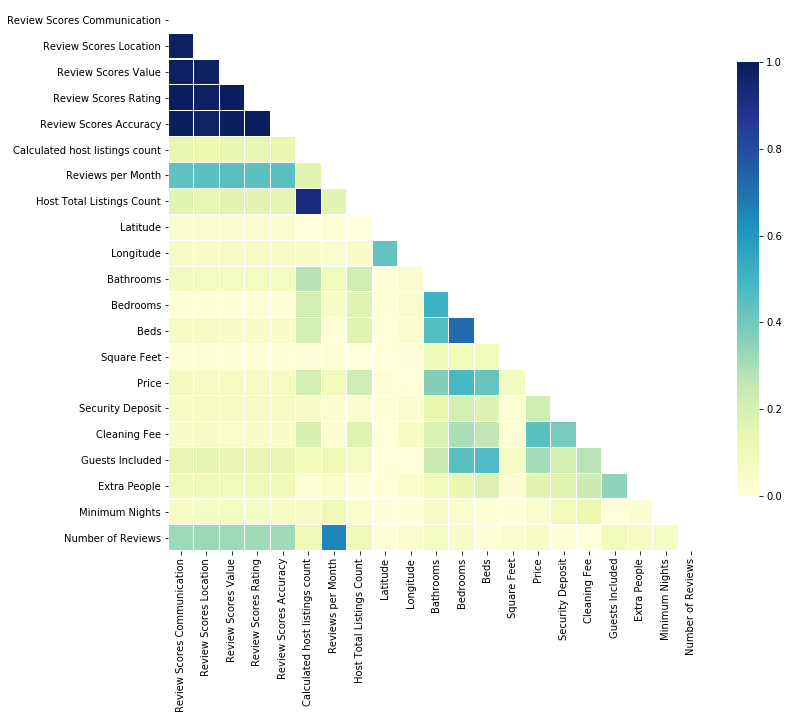

In [33]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numeric_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que con respecto a la variable objetivo, tan solo están altamente correladas las caracteristicas numericas de:

    - Numero de habitaciones
    - Numero de camas
    - Número de baños
    
Ahora, exploraremos las variables nuumericas

## Train Test Split & Feature Engineering

En esta seccion llevaremos a cabo el tratamiento apropiado de las dimensiones. Para las variables categoricas realizaremos la tecnica de One-Hot Encoding (que explicaremos mas adelante) y para las variables numericas realizaremos un escalado.

In [0]:
X_train = data.drop('Price', axis=1)
y_train = data.Price

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
numeric_cols = cols.drop('Price')
cols

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

In [0]:
categorical = []
for col in X_train:
  if col not in numeric_cols:
    categorical.append(col)

In [0]:
numerical_data = X_train[numeric_cols]
X_train[numeric_cols] = scaler.fit_transform(numerical_data)

In [0]:
data = pd.read_csv('train.csv', sep=';', decimal='.')

In [0]:
data = data[features]
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

X_train = data.drop('Price', axis=1)
y_train = data.Price

numerical_data = X_train[numeric_cols]
X_train[numeric_cols] = scaler.fit_transform(numerical_data)


In [41]:
categorical

['Experiences Offered',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Host Neighbourhood',
 'Property Type',
 'Room Type',
 'Bed Type']

In [42]:
y_train.shape

(11741,)

In [43]:
X_train.shape

(11741, 27)

## Preparing Testing Data

In [0]:
data = pd.read_csv('test.csv', sep=';', decimal='.')

In [0]:
data = data[features]
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

X_test = data.drop('Price', axis=1)
y_test = data.Price

numerical_data = X_test[numeric_cols]
X_test[numeric_cols] = scaler.transform(numerical_data)


In [50]:
X_test.shape

(2936, 27)

In [51]:
y_test.shape

(2936,)

## Training and Testing a Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

best mean cross-validation score: 0.494
best parameters: {'max_depth': 9}


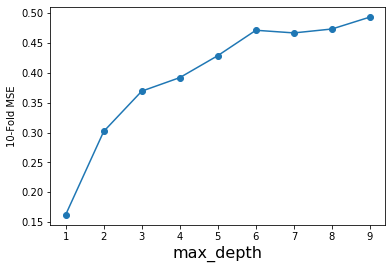

In [53]:
maxDepth = range(1,10)
numLeaves = 3
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [54]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))


Score Train:  0.724591340275002
Score Test:  0.5174313216360564


## Training and Testing a Random Forest

best mean cross-validation score: 0.639
best parameters: {'max_depth': 14}


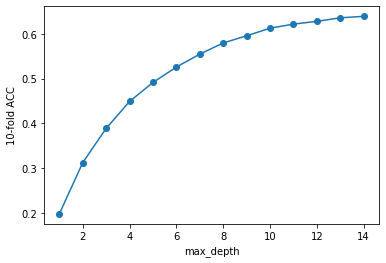

In [55]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [56]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo-2,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.8053039179862688
Score Test:  0.6437050636391625


## Importancia y Dependencia

In [0]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(bagModel)

In [58]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=12,
                                                max_features='sqrt',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=200, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_

In [59]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False])

In [60]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [61]:
selected_feat

Index(['Host Neighbourhood', 'Latitude', 'Longitude', 'Room Type', 'Bathrooms',
       'Bedrooms', 'Beds', 'Cleaning Fee'],
      dtype='object')

Ahora que sabemos cuales son las dimensiones mas relevantes, volvemos a entrenar los modelos tan solo con ellas.

In [0]:
X_train = X_train[selected_feat]

In [0]:
X_test = X_test[selected_feat]

## Decision Tree

best mean cross-validation score: 0.471
best parameters: {'max_depth': 7}


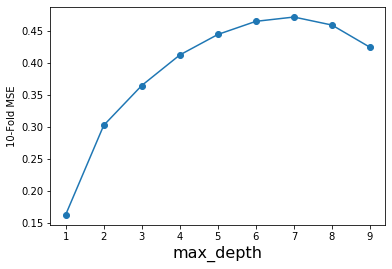

In [65]:
maxDepth = range(1,10)
numLeaves = 3
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [66]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))


Score Train:  0.6063878833770161
Score Test:  0.5101366103226429


## Random Forest

best mean cross-validation score: 0.601
best parameters: {'max_depth': 14}


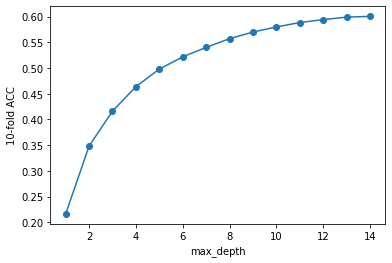

In [67]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth, }

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [68]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.827672821446238
Score Test:  0.6270046279194537


## Train and Test a Gradiant Boost Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000] 
learningRate = [0.1,0.05] 

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.562
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


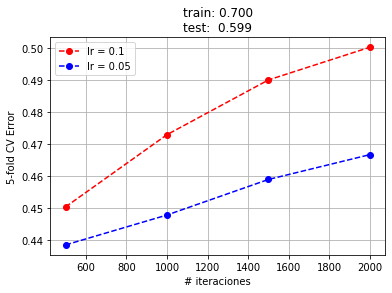

In [70]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()